In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pylab as plt
import seaborn as sns
import joblib

In [2]:
center_trace = joblib.load("../../data/center_trace.pkl")
left_trace = joblib.load("../../data/left_trace.pkl")
right_trace = joblib.load("../../data/right_trace.pkl")
race_trace = joblib.load("../../data/race_trace.pkl")

In [3]:
center_trace

[{'ego_x': -12.379979320590559,
  'ego_y': 25.073895504507718,
  'ego_theta': 6.280638495973108,
  'opp_x': -15.812404810932696,
  'opp_y': 25.005782048774453,
  'opp_theta': 0.044849325638524576,
  'selected_lane': 'center'},
 {'ego_x': -12.249519831263058,
  'ego_y': 25.09696614911769,
  'ego_theta': 0.11317703249963018,
  'opp_x': -15.680377484163628,
  'opp_y': 25.011834615638993,
  'opp_theta': 0.04426496299095842,
  'selected_lane': 'center'},
 {'ego_x': -12.035070443397032,
  'ego_y': 25.172872134666786,
  'ego_theta': 0.3305661982430566,
  'opp_x': -15.456598945229198,
  'opp_y': 25.020561241354397,
  'opp_theta': 0.04133876618334016,
  'selected_lane': 'center'},
 {'ego_x': -11.754122384369868,
  'ego_y': 25.305986373218673,
  'ego_theta': 0.46384849225408564,
  'opp_x': -15.167244000292788,
  'opp_y': 25.033748315681226,
  'opp_theta': 0.044822564493988276,
  'selected_lane': 'center'},
 {'ego_x': -11.42469556196644,
  'ego_y': 25.46205103479734,
  'ego_theta': 0.414046646100

In [19]:
dataset = list()

In [20]:
for trace in [center_trace, left_trace, right_trace, race_trace]:
    for i in range(5, (len(trace)-90)//10):
        dataset.append({
            'input': np.array([[trace[idx]['opp_x'], trace[idx]['opp_y'], trace[idx]['opp_theta']] for idx in range(i*10,(i*10)+10)]),
            'target': np.array([[trace[idx]['opp_x'], trace[idx]['opp_y'], trace[idx]['opp_theta']] for idx in range((i*10)+10,(i+1)*10+80)]),
            'selected_lane': trace[0]['selected_lane']
        })

In [21]:
dataset

[{'input': array([[3.31290606e+00, 2.52628102e+01, 2.37759724e-02],
         [3.71740494e+00, 2.52714609e+01, 1.85886226e-02],
         [4.12177724e+00, 2.52818548e+01, 3.36431288e-02],
         [4.52606447e+00, 2.52923201e+01, 2.02614615e-02],
         [4.93031108e+00, 2.53009131e+01, 2.16543843e-02],
         [5.33441897e+00, 2.53117314e+01, 3.25995960e-02],
         [5.73846793e+00, 2.53216293e+01, 1.67024086e-02],
         [6.14245711e+00, 2.53304597e+01, 2.50369129e-02],
         [6.54630904e+00, 2.53415442e+01, 3.02119669e-02],
         [6.95011773e+00, 2.53508765e+01, 1.51776866e-02]]),
  'target': array([[7.35384414e+00, 2.53601383e+01, 2.85538823e-02],
         [7.75747752e+00, 2.53698404e+01, 2.02834247e-02],
         [8.16107716e+00, 2.53771137e+01, 1.51571700e-02],
         [8.56456021e+00, 2.53861068e+01, 3.01890982e-02],
         [8.96795594e+00, 2.53951591e+01, 1.68190393e-02],
         [9.37130801e+00, 2.54023424e+01, 1.82268862e-02],
         [9.77454948e+00, 2.5411754

In [22]:
dataset_frame = pd.DataFrame(dataset)

In [23]:
dataset_frame

,input,target,selected_lane
0,"[[3.312906063464414, 25.26281020052317, 0.0237...","[[7.353844137096269, 25.36013829303796, 0.0285...",center
1,"[[7.353844137096269, 25.36013829303796, 0.0285...","[[11.382015180377486, 25.44132039016854, 0.009...",center
2,"[[11.382015180377486, 25.44132039016854, 0.009...","[[15.125000949459203, 25.57041685927675, 0.018...",center
3,"[[15.125000949459203, 25.57041685927675, 0.018...","[[17.5945945162102, 25.158239608887914, 5.8126...",center
4,"[[17.5945945162102, 25.158239608887914, 5.8126...","[[19.309295046984605, 23.94379812645397, 5.490...",center
...,...,...,...
263,"[[-39.72335426094666, 50.69282382629424, 6.102...","[[-35.72466853212561, 50.05120981519463, 6.148...",race
264,"[[-35.72466853212561, 50.05120981519463, 6.148...","[[-31.70681037450285, 49.54444859243424, 6.178...",race
265,"[[-31.70681037450285, 49.54444859243424, 6.178...","[[-27.669917152255508, 49.22462806868478, 6.22...",race
266,"[[-27.669917152255508, 49.22462806868478, 6.22...","[[-23.623555571184653, 49.05560253755497, 6.24...",race


In [24]:
dataset_frame.iloc[0]['input'][:,1]

array([25.2628102 , 25.27146088, 25.28185478, 25.29232009, 25.30091313,
       25.31173135, 25.32162935, 25.33045971, 25.34154423, 25.3508765 ])

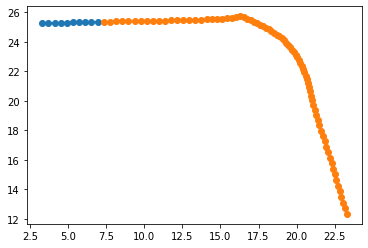

In [26]:
DATA_IDX = 0
plt.plot(dataset_frame.iloc[DATA_IDX]['input'][:,0], dataset_frame.iloc[DATA_IDX]['input'][:,1], marker='o')
plt.plot(dataset_frame.iloc[DATA_IDX]['target'][:,0], dataset_frame.iloc[DATA_IDX]['target'][:,1], marker='o')

In [28]:
dataset_frame.to_pickle("../../data/final_data.pkl")

In [35]:
from sklearn.model_selection import train_test_split
TEST_FRAC = 0.2
classes = dataset_frame['selected_lane']
train_frame, test_frame = train_test_split(dataset_frame,stratify=classes, test_size=TEST_FRAC)

In [38]:
train_frame.groupby(['selected_lane']).count()

,input,target
selected_lane,,
center,54,54
left,53,53
race,54,54
right,53,53


In [37]:
test_frame.groupby(['selected_lane']).count()

,input,target
selected_lane,,
center,13,13
left,14,14
race,13,13
right,14,14


In [39]:
train_frame.to_pickle("../../data/train_data.pkl")
test_frame.to_pickle("../../data/test_data.pkl")